# Table of Contents
 <p><div class="lev2"><a href="#Introduction"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2"><a href="#Related-Work"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Related Work</a></div><div class="lev2"><a href="#Approach"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Approach</a></div><div class="lev2"><a href="#Planar-and-Non-Planar-Curve-Generation"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Planar and Non-Planar Curve Generation</a></div><div class="lev3"><a href="#Non-Planar-Curve-Generation"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Non-Planar Curve Generation</a></div><div class="lev2"><a href="#Discriminate-Planarity-with-PCA"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Discriminate Planarity with PCA</a></div><div class="lev2"><a href="#Autoencoder-model-with-PCA-Weights"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Autoencoder model with PCA Weights</a></div><div class="lev2"><a href="#Autoencoder-model-with-Random-Weights"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Autoencoder model with Random Weights</a></div><div class="lev1"><a href="#References"><span class="toc-item-num">1&nbsp;&nbsp;</span>References</a></div>

# Table of Contents

## Introduction

In this paper, we study the computational basis for perception of planar and non-planar curves. The basis of perceptual reconstruction of 3D surface in human vision is a long studied problem. 

The problem of 3D percept by visual system as well as 2D images is often formulated as an "inverse problem". An inverse problem is defined as a mapping between parameters (objects in consideration) and measurements (data from visual perception). The correspondence between the object and the measurements/data is a mapping. Solving an inverse problem amounts to finding estimations of parameters (objects) from knowledge of the data (inference). The existence of several mapping functions from object to data make this inverse problem computationally difficult. It is believed that the visual system imposes certain constraints on the family of solutions in order to efficiently solve this inverse problem.


## Related Work

 __TBD__
 The role of surface contours in perception of 3D surfaces was studied by \cite{Stevens1981}, where role of planarity and local curvature of surfaces. 
 

## Approach

We study three statistical and computational methods to test if they can efficiently discriminate planar and non-planar curves. 

- The first mechanism is to use eigenvector based principle component analysis procedure. The 3D curves are projected onto the first two orthogonal axes with maximum covariance and then reconstructed from these projects. The sum of squared errors in reconstruction of original curve is then recorded. 
    A Gaussian naive Bayes classifier is then trained on the reconstruction errors of the curves. The classification errors from the Bayes classifier to obtained using leave-one-out cross validation analysis. 

- The second mechanism is to use a linear auto-encoder model to train on the curves directly by learning to represent the 3D curves in 2D space and train on the reconstruction error using simple back-propagation. Point-wise reconstruction errors are recorded and again fed into a Gaussian naive Bayes classifier. 

- The third mechanism is a modification of the second one in that, instead of starting with random weights, we inject the weights learned from the PCA into the auto-encoder model. The same procedure is followed for the rest of the task of recording reconstruction error and training a Bayes classifier on the errors to discriminate the planes.


## Planar and Non-Planar Curve Generation



The method to generate curves uses a cube of unit size as a bounding box for the curves. Points are randomly chosen from the enclosed area within the cube by diving the unit cube into sub-cubes. The constraints on choice of points (or volume available for choosing random points) from the sub-cubes can be altered for the curves to planar or non-planar. The degree of non-planarity can be controlled based on how the points are chosen.

For planar curves, we choose 4 adjacent sub-cubes stacked vertically on y-axis. We then slice the area contained in all four cubes into a plane along the vertical axis by restricting the volume available for choosing random points from the sub-cubes. One point is chosen from each sub-cube. Then the original vertical plane is rotated randomly along x, y and z axis by random angles. The four points are then interpolated using a spline. After interpolation, we obtain 300 points in 3D for the planar curve.

A randomly generated planar curve is plotted below. In order to test the curve generation process, the cell below can be executed by choosing the cell and pressing "shift+enter" keys. The plot generated is an interactive plot that will let the user rotate the curve in all three dimensions.

In [1]:
import helper
#get_ipython().magic('matplotlib notebook')

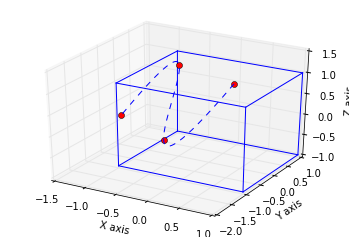

In [12]:
helper.create_show_p_curve()

### Non-Planar Curve Generation

The process to create non-planar curves is less restrictive. We divide the cube into 8 sub-cubes and randomly choose points from each sub-cube. The chosen points are interpolated using spline to give us 300 3-dimensional points in the space contained within the unit cube.

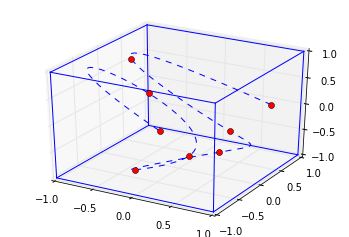

In [16]:
helper.create_plot_new_np_curve()

## Discriminate Planarity with PCA 


The first method uses eigenvectors for the curves along first two axes of maximum eigenvalues for projection. Then the curve is reconstructed in three dimensions by re-projecting the points along the original axes. 

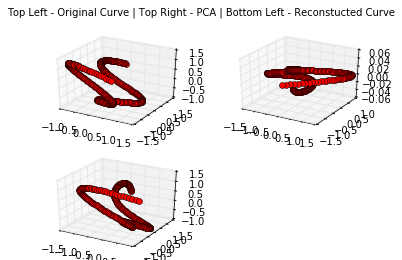

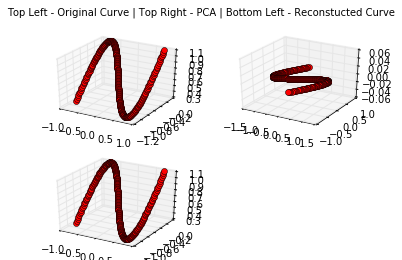

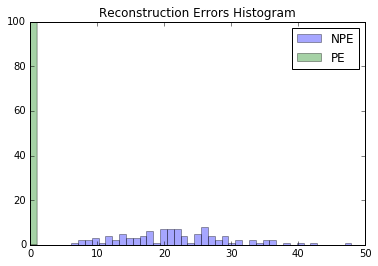

In [17]:
# PCA analysis and plot
helper.plot_PCA_errors()   

## Autoencoder model with PCA Weights

We use the eigenvalue matrix to initialize weights of our auto-encoder network. The auto-encoder network has 3 input nodes, 2 hidden nodes and 3 output nodes. The network takes 3 dimensional points from the curve, passes the points through the hidden nodes thereby decompressing the input to 2 dimensions. It then reconstructs the input by forwarding the two dimensional values from the hidden layer back into three dimension output nodes.

The sum of squared errors between the output point and initial inputs are then recorded as each point in the curve passes through the network. We sum all errors of each of our total 100 planar curves and 100 non-planar curves. The errors are plotted in the graphs below:  

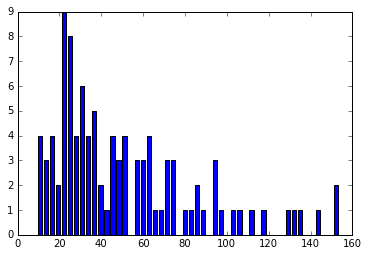

In [5]:
#Non-Planar Errors
helper.ae_with_pca_wt_np_errors()

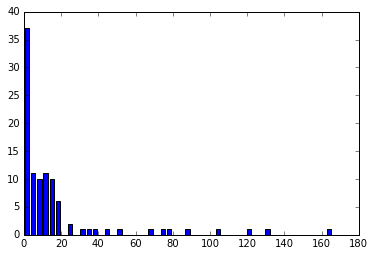

In [6]:
helper.ae_with_pca_wt_p_errors()

## Autoencoder model with Random Weights


A linear auto-encoder with randomly initialized weights did poorly when trying to differentiate between non-planar and planar curves as shown in the plots below. We can see there is a significant overlap in errors. We also see a higher error magnitude in both planar and non-planar curves.

[161, 183]


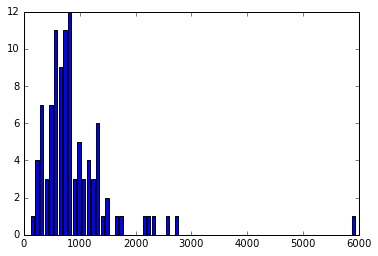

In [7]:
# non-planar curves
helper.rdm_np_errors()

[161, 183]


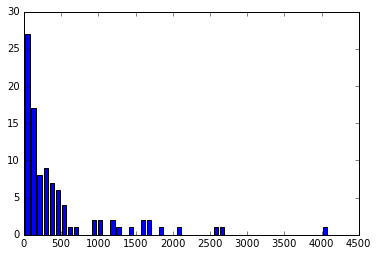

In [8]:
# planar curves
helper.rdm_p_errors()

[]


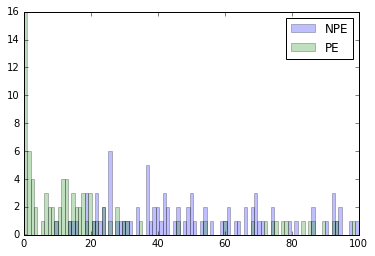

In [9]:
# Random weights Auto-encoder Planar and Non-Planar mixed errors
helper.rdm_wt_ae_errors()

# References

<mark> <b>The bib file biblio.bib was not found

</b> </mark>(<a id="cit-Stevens1981" href="#call-Stevens1981">?</a>) !! _This reference was not found in biblio.bib _ !!

